Otsu threshold: 164 → custom = 49.20


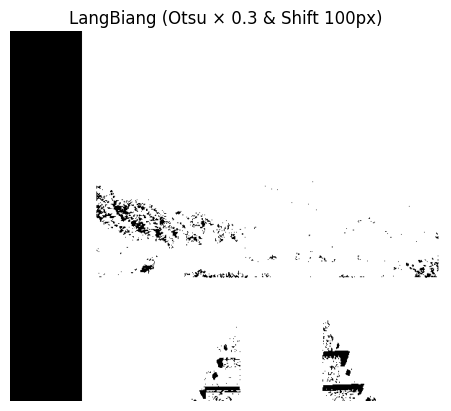

In [ ]:
#Bài 1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu


img = Image.open("exercise/dalat.jpg")
img_np = np.array(img)
H, W, _ = img_np.shape
h = H // 2
w = W // 3


region1 = img_np[0:h, 0:w]


gray_img = Image.fromarray(region1).convert('L')  # giống mẫu
a = np.asarray(gray_img)


thres = threshold_otsu(a)
print(f"Otsu threshold: {thres} → custom = {thres * 0.3:.2f}")
custom_thresh = thres * 0.3


b = a > custom_thresh


h_, w_ = b.shape
translated = np.zeros((h_, w_ + 100), dtype=np.uint8)
translated[:, 100:] = b * 255  # dịch sang phải


out_img = Image.fromarray(translated)
out_img.save("lang_biang.jpg")

plt.imshow(out_img, cmap='gray')
plt.title("LangBiang (Otsu × 0.3 & Shift 100px)")
plt.axis('off')
plt.show()


Mean gray: 0.51 - Min: 0.03 - Max: 1.00


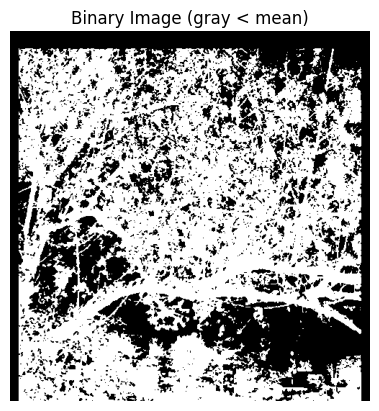

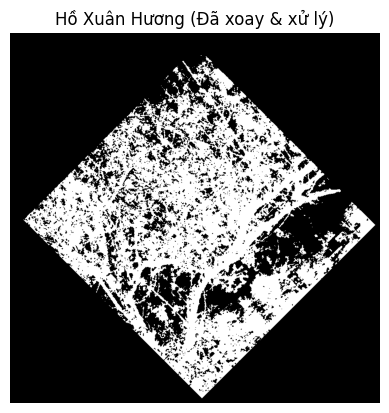

In [ ]:
#Bài 2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from skimage.color import rgb2gray


img = Image.open("exercise/dalat.jpg")
img_np = np.array(img)
H, W, _ = img_np.shape
h = H // 2
w = W // 3


region2 = img_np[0:h, w:2*w]


gray = rgb2gray(region2)


print(f"Mean gray: {np.mean(gray):.2f} - Min: {gray.min():.2f} - Max: {gray.max():.2f}")


block_size = 51
offset = 10
thresh = threshold_local(gray, block_size, offset=offset)


mean_val = np.mean(gray)
binary = gray < mean_val  


plt.imshow(binary, cmap='gray')
plt.title("Binary Image (gray < mean)")
plt.axis('off')
plt.show()

binary_rgb = np.stack([binary * 255]*3, axis=2).astype(np.uint8)
roi_img = Image.fromarray(binary_rgb)
rotated_img = roi_img.rotate(45, expand=True, fillcolor=(0, 0, 0))

rotated_img.save("ho_xuan_huong.jpg")
plt.imshow(rotated_img)
plt.title("Hồ Xuân Hương (Đã xoay & xử lý)")
plt.axis('off')
plt.show()


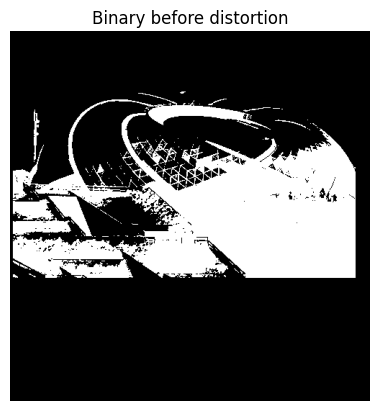

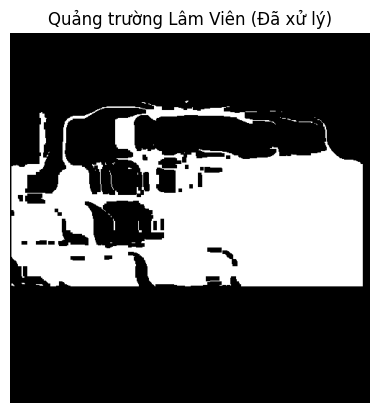

In [ ]:
#Bài 3
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing, geometric_transform
from skimage.color import rgb2gray


img = Image.open("exercise/dalat.jpg")
img_np = np.array(img)
H, W, _ = img_np.shape
h = H // 2
w = W // 3


region3 = img_np[0:h, 2*w:3*w]


gray = rgb2gray(region3)

binary = gray < 0.6  # Chọn vùng tối

plt.imshow(binary, cmap='gray')
plt.title("Binary before distortion")
plt.axis('off')
plt.show()


def coord_map(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1] / 10.0) + outcoord[1]
    return a, b


distorted = geometric_transform(binary.astype(float), coord_map, order=0)
closed = binary_closing(distorted > 0.5, structure=np.ones((3, 3)), iterations=2)

# [Debug] Hiển thị kết quả sau biến dạng + closing
plt.imshow(closed, cmap='gray')
plt.title("Quảng trường Lâm Viên (Đã xử lý)")
plt.axis('off')
plt.show()


closed_rgb = np.stack([closed * 255] * 3, axis=2).astype(np.uint8)
Image.fromarray(closed_rgb).save("quan_truong_lam_vien.jpg")


Menu:
1. geometric_transformation
   a. coordinate_mapping
   b. Rotate
   c. Scale
   d. Shift
2. segment
   e. Adaptive_thresholding
   f. Binary_dilation
   g. Binary_erosion
   h. Otsu
>> Flip ngang ảnh
✅ Đã lưu thành output.jpg


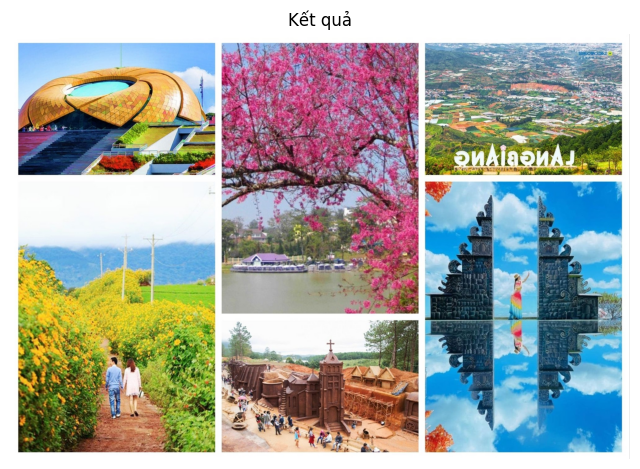

In [ ]:
#bài 4
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
def coordinate_mapping(image):
    print(">> Flip ngang ảnh")
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def rotate(image, angle=45):
    print(f">> Xoay ảnh {angle} độ")
    return image.rotate(angle, expand=True)

def scale(image, fx=1.5, fy=1.5):
    print(">> Phóng to ảnh")
    new_size = (int(image.width * fx), int(image.height * fy))
    return image.resize(new_size)

def shift(image, dx=100, dy=0):
    print(f">> Dịch ảnh sang phải {dx}px")
    array = np.array(image)
    shifted = np.roll(array, shift=dx, axis=1)
    shifted[:, :dx] = 255  # Fill phần bị dịch bằng trắng
    return Image.fromarray(shifted)

def adaptive_thresholding(image, threshold=60):
    print(f">> Ngưỡng adaptive = {threshold}")
    gray = ImageOps.grayscale(image)
    arr = np.array(gray)
    binary = np.where(arr > threshold, 255, 0).astype(np.uint8)
    return Image.fromarray(binary).convert("RGB")

def binary_dilation(image):
    print(">> Dilation")
    arr = np.array(ImageOps.grayscale(image))
    binary = np.where(arr > 127, 1, 0)
    kernel = np.ones((3, 3))
    padded = np.pad(binary, 1, mode='constant')
    result = np.zeros_like(binary)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            region = padded[i:i+3, j:j+3]
            result[i, j] = 1 if np.sum(region * kernel) > 0 else 0
    return Image.fromarray((result * 255).astype(np.uint8)).convert("RGB")

def binary_erosion(image):
    print(">> Erosion")
    arr = np.array(ImageOps.grayscale(image))
    binary = np.where(arr > 127, 1, 0)
    kernel = np.ones((3, 3))
    padded = np.pad(binary, 1, mode='constant')
    result = np.zeros_like(binary)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            region = padded[i:i+3, j:j+3]
            result[i, j] = 1 if np.all(region * kernel == 1) else 0
    return Image.fromarray((result * 255).astype(np.uint8)).convert("RGB")

def otsu(image):
    print(">> Otsu Thresholding")
    gray = ImageOps.grayscale(image)
    arr = np.array(gray)
    hist, bins = np.histogram(arr, bins=256, range=(0, 256))
    total = arr.size
    sumB = 0
    wB = 0
    maximum = 0.0
    sum1 = np.dot(np.arange(256), hist)
    for i in range(256):
        wB += hist[i]
        if wB == 0:
            continue
        wF = total - wB
        if wF == 0:
            break
        sumB += i * hist[i]
        mB = sumB / wB
        mF = (sum1 - sumB) / wF
        between = wB * wF * (mB - mF)**2
        if between > maximum:
            threshold = i
            maximum = between
    binary = np.where(arr > threshold, 255, 0).astype(np.uint8)
    return Image.fromarray(binary).convert("RGB")
def show_menu():
    print("Menu:")
    print("1. geometric_transformation")
    print("   a. coordinate_mapping")
    print("   b. Rotate")
    print("   c. Scale")
    print("   d. Shift")
    print("2. segment")
    print("   e. Adaptive_thresholding")
    print("   f. Binary_dilation")
    print("   g. Binary_erosion")
    print("   h. Otsu")

def apply_option(image, opt):
    if opt == "a": return coordinate_mapping(image)
    elif opt == "b": return rotate(image)
    elif opt == "c": return scale(image)
    elif opt == "d": return shift(image)
    elif opt == "e": return adaptive_thresholding(image)
    elif opt == "f": return binary_dilation(image)
    elif opt == "g": return binary_erosion(image)
    elif opt == "h": return otsu(image)
    else:
        print("Lựa chọn không hợp lệ.")
        return image

def show_image(image, title="Kết quả"):
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
image = Image.open("exercise/dalat.jpg")

show_menu()
mode = input("Chọn 1 chức năng (1) hay 2 chức năng (2): ")

if mode == "1":
    opt = input("Nhập lựa chọn (a-h): ").lower()
    result = apply_option(image, opt)
elif mode == "2":
    opt1 = input("Chọn geometric_transformation (a-d): ").lower()
    opt2 = input("Chọn segment (e-h): ").lower()
    temp = apply_option(image, opt1)
    result = apply_option(temp, opt2)
else:
    print("❌ Lựa chọn không hợp lệ.")
    result = image

result.save("output.jpg")
print("✅ Đã lưu thành output.jpg")
show_image(result)

